In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Initialize a scaler variable for scaling 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.MinMaxScaler()

#for VIF to compute values need to write code
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the Application database. Store it in a variable called 'Lead_df'.

In [2]:
#Reading the file

Lead_df = pd.read_csv(r'C:\Users\esusvem\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspecting  % null values  of all the columns
print(round(100*(Lead_df.isnull().sum()/len(Lead_df)),2).sort_values(ascending=False))

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

# Subtask 1.2: Inspect the dataframe
Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
# Inspect the dataframe shape
Lead_df.shape

(9240, 37)

In [5]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Inspect the dataframe ,summary information
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Task 2: Cleaning the Data

In [7]:
#Handling the values which has 'select'
#Select means the customer didnt do any selection there , we can treat them as null as we dont know the intent there 
Lead_df = Lead_df.replace('Select', np.nan)
Lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Inspecting null values  of all the columns
Lead_df.isnull().sum()
# Inspecting  % null values  of all the columns
print(round(100*(Lead_df.isnull().sum()/len(Lead_df)),2).sort_values(ascending=False))

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [9]:
#Dropping columns with higher % of  NaN values , Considering the threhold % of higher values as 40%
Lead_df = Lead_df.drop(Lead_df.loc[:,list(round(100*(Lead_df.isnull().sum()/len(Lead_df.index)), 2)>40)].columns, 1)

In [10]:
# Inspecting  % null values  of all the columns
print(round(100*(Lead_df.isnull().sum()/len(Lead_df)),2).sort_values(ascending=False))

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Number                                       0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search    

In [11]:
# Identifying if any column exists with only null values
Lead_df.isnull().all(axis=0).any()

False

In [12]:
#Check the unique categories for all the categorical columns 
print(Lead_df['Magazine'].value_counts())
print(Lead_df['Receive More Updates About Our Courses'].value_counts())
print(Lead_df['Update me on Supply Chain Content'].value_counts())
print(Lead_df['I agree to pay the amount through cheque'].value_counts())
print(Lead_df['What is your current occupation'].value_counts())
print(Lead_df['Search'].value_counts())
print(Lead_df['Newspaper Article'].value_counts())
print(Lead_df['Newspaper'].value_counts())
print(Lead_df['Digital Advertisement'].value_counts())
print(Lead_df['What matters most to you in choosing a course'].value_counts())
print(Lead_df['A free copy of Mastering The Interview'].value_counts())
print(Lead_df['Do Not Email'].value_counts())
print(Lead_df['Do Not Call'].value_counts())
print(Lead_df['Last Activity'].value_counts())

No    9240
Name: Magazine, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
No     8506
Yes     734
Name: Do Not Email,

In [13]:
#Dropping columns which has only one unique value
Lead_df= Lead_df.loc[:,Lead_df.nunique()!=1]
Lead_df.shape

(9240, 25)

In [14]:
#Dropping the column as it has highly skewed %  for only 1 categorical 
#Lead_df = Lead_df.drop('What is your current occupation', axis=1)
Lead_df = Lead_df.drop('Search', axis=1)
Lead_df = Lead_df.drop('Newspaper Article', axis=1)
Lead_df = Lead_df.drop('Newspaper', axis=1)
Lead_df = Lead_df.drop('Digital Advertisement', axis=1)
Lead_df = Lead_df.drop('What matters most to you in choosing a course', axis=1)
Lead_df = Lead_df.drop('A free copy of Mastering The Interview', axis=1)
Lead_df = Lead_df.drop('Do Not Email', axis=1)
Lead_df = Lead_df.drop('Do Not Call', axis=1)
Lead_df.drop('X Education Forums',axis=1, inplace=True)
Lead_df.drop('Through Recommendations',axis=1, inplace=True)


Lead_df.shape

(9240, 15)

In [15]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9240 non-null   object 
 1   Lead Number                      9240 non-null   int64  
 2   Lead Origin                      9240 non-null   object 
 3   Lead Source                      9204 non-null   object 
 4   Converted                        9240 non-null   int64  
 5   TotalVisits                      9103 non-null   float64
 6   Total Time Spent on Website      9240 non-null   int64  
 7   Page Views Per Visit             9103 non-null   float64
 8   Last Activity                    9137 non-null   object 
 9   Country                          6779 non-null   object 
 10  Specialization                   5860 non-null   object 
 11  What is your current occupation  6550 non-null   object 
 12  Tags                

# Dropping rows based on high % of missing values

In [16]:
Null_rows=Lead_df.isnull().sum(axis=1).sort_values(ascending=False)
print(Null_rows)

5840    8
1393    7
77      7
7847    7
2942    7
       ..
3969    0
3972    0
3974    0
3975    0
9239    0
Length: 9240, dtype: int64


In [17]:
#Dropping the null rows  which are greater than or equal to 30 %
Null_rows[Null_rows.values>=0.3*len(Lead_df)]
Lead_df.drop(labels=Null_rows,axis=0,inplace=True)
Lead_df.shape

(9231, 15)

In [18]:
# Removing unwanted column for the analysis:

Lead_df = Lead_df.drop('Tags', axis=1)
Lead_df = Lead_df.drop('Last Activity', axis=1)
Lead_df = Lead_df.drop('Prospect ID', axis=1)

In [19]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9231 entries, 9 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9231 non-null   int64  
 1   Lead Origin                      9231 non-null   object 
 2   Lead Source                      9195 non-null   object 
 3   Converted                        9231 non-null   int64  
 4   TotalVisits                      9094 non-null   float64
 5   Total Time Spent on Website      9231 non-null   int64  
 6   Page Views Per Visit             9094 non-null   float64
 7   Country                          6773 non-null   object 
 8   Specialization                   5856 non-null   object 
 9   What is your current occupation  6544 non-null   object 
 10  City                             5566 non-null   object 
 11  Last Notable Activity            9231 non-null   object 
dtypes: float64(2), int64

#Imputing with Median values because the continuous variables have outliers¶


In [20]:
# Inspecting  % null values  of all the columns
print(round(100*(Lead_df.isnull().sum()/len(Lead_df)),2).sort_values(ascending=False))

City                               39.70
Specialization                     36.56
What is your current occupation    29.11
Country                            26.63
Page Views Per Visit                1.48
TotalVisits                         1.48
Lead Source                         0.39
Last Notable Activity               0.00
Total Time Spent on Website         0.00
Converted                           0.00
Lead Origin                         0.00
Lead Number                         0.00
dtype: float64


In [21]:
#Checking the median ,mean, outlier values to impute missing values
Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9231.000000,9231.000000,9094.000000,9231.000000,9094.000000
mean,617146.020149,0.385440,3.447108,487.561694,2.364004
std,23377.929255,0.486726,4.856662,547.867732,2.161956
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596476.500000,0.000000,1.000000,12.000000,1.000000
50%,615461.000000,0.000000,3.000000,248.000000,2.000000
75%,637325.500000,1.000000,5.000000,936.000000,3.000000
max,660616.000000,1.000000,251.000000,2272.000000,55.000000


In [22]:
Lead_df['TotalVisits'].replace(np.NaN, Lead_df['TotalVisits'].median(), inplace =True)
Lead_df['Page Views Per Visit'].replace(np.NaN, Lead_df['Page Views Per Visit'].median(), inplace =True)

Lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9231.000000,9231.000000,9231.000000,9231.000000,9231.000000
mean,617146.020149,0.385440,3.440472,487.561694,2.358601
std,23377.929255,0.486726,4.820787,547.867732,2.146302
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596476.500000,0.000000,1.000000,12.000000,1.000000
50%,615461.000000,0.000000,3.000000,248.000000,2.000000
75%,637325.500000,1.000000,5.000000,936.000000,3.000000
max,660616.000000,1.000000,251.000000,2272.000000,55.000000


In [23]:
# Inspecting  % null values  of all the columns
print(round(100*(Lead_df.isnull().sum()/len(Lead_df)),2).sort_values(ascending=False))

City                               39.70
Specialization                     36.56
What is your current occupation    29.11
Country                            26.63
Lead Source                         0.39
Last Notable Activity               0.00
Page Views Per Visit                0.00
Total Time Spent on Website         0.00
TotalVisits                         0.00
Converted                           0.00
Lead Origin                         0.00
Lead Number                         0.00
dtype: float64


#Check the unique categories for each column

In [24]:
Lead_df['Country'].value_counts()

India                   6486
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
South Africa               4
Sweden                     3
Asia/Pacific Region        2
Italy                      2
Philippines                2
Belgium                    2
Netherlands                2
Bangladesh                 2
Uganda                     2
China                      2
Ghana                      2
Sri Lanka                  1
Vietnam                    1
Denmark                    1
Tanzania                   1
Russia                     1
Switzerland                1
Kenya         

#From the above count of the country we can see that India has  major count and remaining countries  has smaller portion of Count.Hence here we merge all the remaining ocuntries to Abroad  category.

In [25]:
#Imputing with Mode values for all the missing values for the country
Lead_df['Country'].mode()
Lead_df['Country'].replace(np.NaN, Lead_df['Country'].mode(), inplace =True)

In [26]:
Lead_df['Country'] = Lead_df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
Lead_df['Country'].value_counts()

India            6486
Outside India    2745
Name: Country, dtype: int64

In [27]:
Lead_df['City'].value_counts()

Mumbai                         3218
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [28]:
#Imputing with Mode values for all the missing values for the City
Lead_df['City'].mode()
Lead_df['City'].replace(np.NaN, Lead_df['City'].mode(), inplace =True)

In [29]:
Lead_df['City'].value_counts()
Lead_df['City']= Lead_df['City'].apply(lambda x: 'Mumbai' if x=='Mumbai' else 'Other Cities')
Lead_df['City'].value_counts()

Other Cities    6013
Mumbai          3218
Name: City, dtype: int64

In [30]:
Lead_df['Specialization'].value_counts()
#Imputing with Mode values for all the missing values for the City
Lead_df['Specialization'].mode()
Lead_df['Specialization'].replace(np.NaN, Lead_df['Specialization'].mode(), inplace =True)

In [31]:
Lead_df['What is your current occupation'].value_counts()
Lead_df['What is your current occupation']= Lead_df['What is your current occupation'].apply(lambda x: 'Unemployed' if x=='Unemployed' else 'Others')
Lead_df['What is your current occupation'].value_counts()

Unemployed    5595
Others        3636
Name: What is your current occupation, dtype: int64

In [32]:
# Inspecting  % null values  of all the columns
print(round(100*(Lead_df.isnull().sum()/len(Lead_df)),2).sort_values(ascending=False))

Specialization                     36.56
Lead Source                         0.39
Last Notable Activity               0.00
City                                0.00
What is your current occupation     0.00
Country                             0.00
Page Views Per Visit                0.00
Total Time Spent on Website         0.00
TotalVisits                         0.00
Converted                           0.00
Lead Origin                         0.00
Lead Number                         0.00
dtype: float64


In [33]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9231 entries, 9 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9231 non-null   int64  
 1   Lead Origin                      9231 non-null   object 
 2   Lead Source                      9195 non-null   object 
 3   Converted                        9231 non-null   int64  
 4   TotalVisits                      9231 non-null   float64
 5   Total Time Spent on Website      9231 non-null   int64  
 6   Page Views Per Visit             9231 non-null   float64
 7   Country                          9231 non-null   object 
 8   Specialization                   5856 non-null   object 
 9   What is your current occupation  9231 non-null   object 
 10  City                             9231 non-null   object 
 11  Last Notable Activity            9231 non-null   object 
dtypes: float64(2), int64

#Checking for Outliers

In [34]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
Lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9231.0,617146.020149,23377.929255,579533.0,596476.5,615461.0,637325.5,650408.0,655351.5,659478.2,660616.0
Converted,9231.0,0.385440,0.486726,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
TotalVisits,9231.0,3.440472,4.820787,0.0,1.0,3.0,5.0,7.0,10.0,17.0,251.0
Total Time Spent on Website,9231.0,487.561694,547.867732,0.0,12.0,248.0,936.0,1379.0,1562.0,1840.7,2272.0
Page Views Per Visit,9231.0,2.358601,2.146302,0.0,1.0,2.0,3.0,5.0,6.0,9.0,55.0


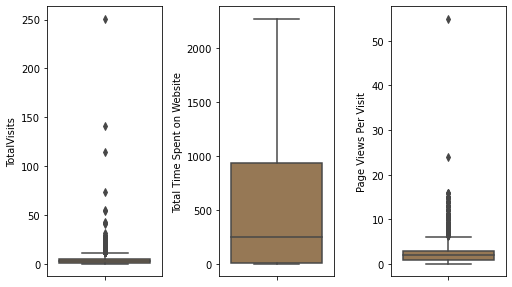

In [35]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=Lead_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

#Handling outliers values based for the continuous variable

In [36]:
Q1 = Lead_df['TotalVisits'].quantile(0.25)
Q3 = Lead_df['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
Lead_df=Lead_df.loc[(Lead_df['TotalVisits'] >= Q1 - 1.5*IQR) & (Lead_df['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = Lead_df['Page Views Per Visit'].quantile(0.25)
Q3 = Lead_df['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
Lead_df=Lead_df.loc[(Lead_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (Lead_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

Lead_df.shape

(8602, 12)

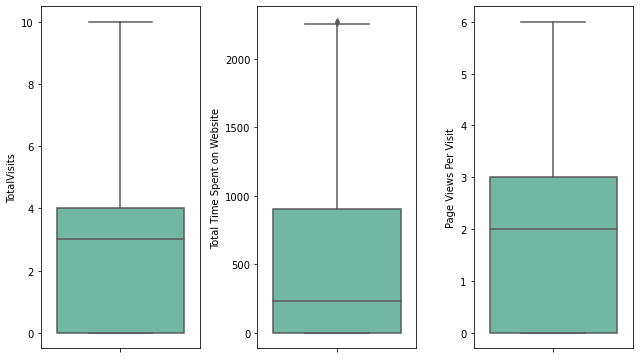

In [37]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=Lead_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

In [38]:
Lead_df.shape

(8602, 12)

In [39]:
Lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 9 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      8602 non-null   int64  
 1   Lead Origin                      8602 non-null   object 
 2   Lead Source                      8566 non-null   object 
 3   Converted                        8602 non-null   int64  
 4   TotalVisits                      8602 non-null   float64
 5   Total Time Spent on Website      8602 non-null   int64  
 6   Page Views Per Visit             8602 non-null   float64
 7   Country                          8602 non-null   object 
 8   Specialization                   5323 non-null   object 
 9   What is your current occupation  8602 non-null   object 
 10  City                             8602 non-null   object 
 11  Last Notable Activity            8602 non-null   object 
dtypes: float64(2), int64

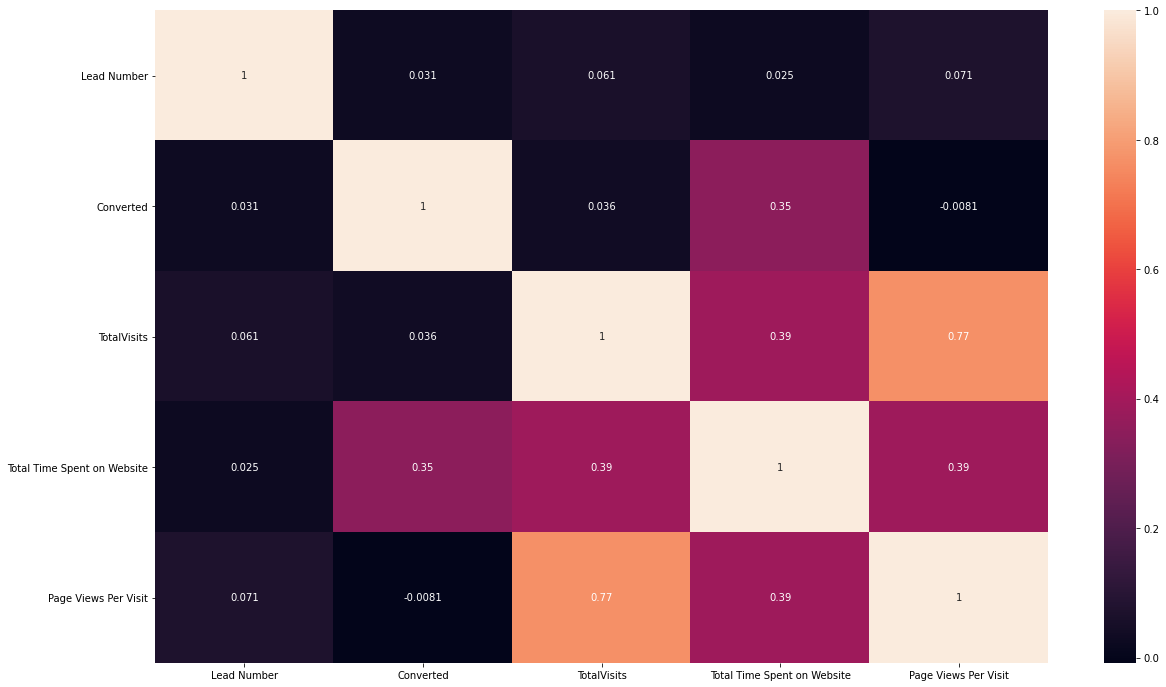

In [40]:
#Checking the correlation of the variables
plt.figure(figsize=(20,12))
sns.heatmap(Lead_df.corr(),annot=True)
plt.show()

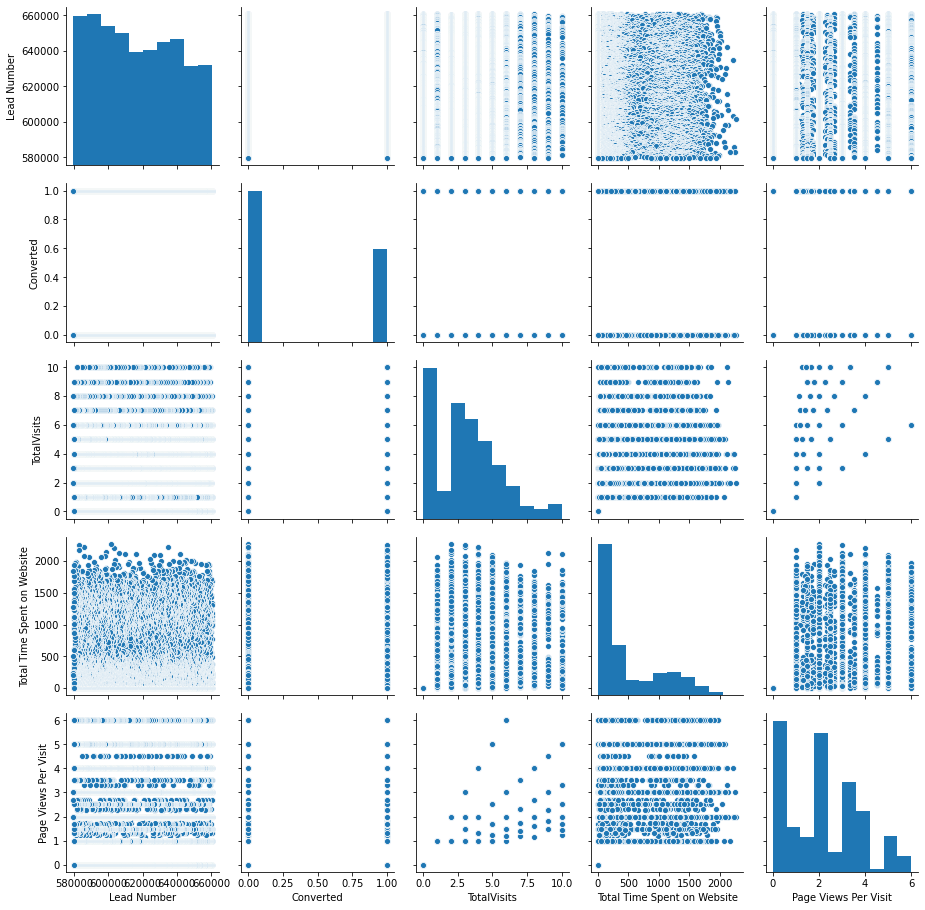

In [41]:
#Visualization 
sns.pairplot(Lead_df)
plt.show()

# Task 2: Data Preparation

In [42]:
#boomData_new = pd.concat([boomData,season_dummies, mnth_dummies, weekday_dummies, wthr_dummies], axis=1)
# Create dummy variables for the categorical variables 



# Lead Origin	Lead Source Country	Specialization	What is your current occupation City	Last Notable Activity

originDummies = pd.get_dummies(Lead_df['Lead Origin'], drop_first=True)
sourceDummies = pd.get_dummies(Lead_df['Lead Source'], drop_first=True)
cntryDummies = pd.get_dummies(Lead_df['Country'], drop_first=True)
specialznDummies = pd.get_dummies(Lead_df['Specialization'], drop_first=True)
occupnDummies = pd.get_dummies(Lead_df['What is your current occupation'], drop_first=True)
cityDummies = pd.get_dummies(Lead_df['City'], drop_first=True)
activityDummies = pd.get_dummies(Lead_df['Last Notable Activity'], drop_first=True)


In [43]:
# Since there are dummy variables for these categorical columns, they are being dropped.
Lead_df.drop(columns = ['Lead Origin', 'Lead Source', 'Country', 'Specialization', 
                        'What is your current occupation', 'City', 'Last Notable Activity'], inplace=True, axis=1)
Lead_df.shape

Lead_df_new = pd.concat([Lead_df,originDummies, sourceDummies, cntryDummies, specialznDummies,
                         occupnDummies,cityDummies, activityDummies], axis=1)
Lead_df_new.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Outside India,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Other Cities,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
9,660616,0,4.0,58,4.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11,660570,1,8.0,1343,2.67,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13,660558,0,5.0,170,5.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14,660553,0,1.0,481,1.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,660547,1,6.0,1012,6.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Subtask 2.1: Test-Train Split

In [44]:
# Divide the dataset into test and train sets

 
X = Lead_df_new
y = Lead_df_new.pop('Converted')
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train_lr

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Outside India,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Other Cities,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
5065,611217,2.0,221,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
542,654712,4.0,347,4.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6538,599610,0.0,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7315,593314,4.0,89,2.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6666,598742,3.0,1371,3.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,656354,8.0,246,2.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
95,659562,4.0,161,2.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8641,583761,0.0,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7448,592425,5.0,933,5.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Subtask 2.2: Scaling 

In [45]:

# Using the above initialized scaler variable, perform scaling on the countryData dataset.
# Identify the columns to be scaled 

# The following variables need to be scaled - 
# TotalVisits	
# Total Time Spent on Website	
# Page Views Per Visit

toScale = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
Lead_df_scaled = Lead_df_new.copy()
Lead_df_scaled[toScale] = scaler.fit_transform(Lead_df_new[toScale])
Lead_df_scaled

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Outside India,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Other Cities,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
9,660616,0.4,0.025528,0.666667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11,660570,0.8,0.591109,0.445000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13,660558,0.5,0.074824,0.833333,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14,660553,0.1,0.211708,0.166667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,660547,0.6,0.445423,1.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,0.8,0.812060,0.445000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,579546,0.2,0.104754,0.333333,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,579545,0.2,0.087588,0.333333,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,579538,0.3,0.219630,0.500000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [46]:
### Checking the Lead Conversion Rate
converted = (sum(Lead_df['Converted'])/len(Lead_df['Converted'].index))*100
converted

#Lead_df_scaled.info()

38.223668914206

## Task 3: Data Modeling and Evaluation

In [47]:
# Logistic regression model
logreg = sm.GLM(y_train_lr,(sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     5959
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.0
Date:                Mon, 07 Sep 2020   Deviance:                       5180.1
Time:                        15:50:08   Pearson chi2:                 6.04e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           16.0536   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Number                   1.033e-05    1.6e-06      6.461      0.000     7.2e-06    1.35e-05
TotalVisits                      0.1213      0.024      5.160      0.000       0.075       0.167
Total Time Spent on Website      0.0020   7.53e-05     26.700      0.000       0.002       0.002
Page Views Per Visit            -0.1486      0.037     -3.967      0.000      -0.222      -0.075
Landing Page Submission         -0.8407      0.132     -6.376      0.000      -1.099      -0.582
Lead Add Form                   -0.5598      1.542     -0.363      0.717      -3.582       2.462
Lead Import                     -1.4217      1.648     -0.863      0.388      -4.651       1.807
Quick Add Form                  17.5641   7.97e+04      0.000      1.000   -1.56e+05    1.56e+05
Direct Traffic                  -2.9941      1.555     -1.925      0.054      -6.043       0.054
Facebook                        -1.9824      1.640     -1.208      0.227      -5.198       1.233
Google                          -2.7017      1.556     -1.737      0.082      -5.751       0.347
Live Chat                       21.2948   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
NC_EDM                          20.8587   7.99e+04      0.000      1.000   -1.57e+05    1.57e+05
Olark Chat                      -2.1620      1.550     -1.395      0.163      -5.200       0.876
Organic Search                  -2.9002      1.557     -1.862      0.063      -5.953       0.152
Pay per Click Ads              -25.0230   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Press_Release                  -23.8805   7.94e+04     -0.000      1.000   -1.56e+05    1.56e+05
Reference                        1.0888      0.528      2.063      0.039       0.054       2.123
Referral Sites                  -3.2676      1.589     -2.056      0.040      -6.383      -0.152
Social Media                    -1.2902      2.419     -0.533      0.594      -6.030       3.450
WeLearn                         20.1489   7.97e+04      0.000      1.000   -1.56e+05    1.56e+05
Welingak Website                 3.5709      1.123      3.181      0.001       1.370       5.771
bing                            -2.5926      2.086     -1.243      0.214      -6.680       1.495
blog                           -25.5953   7.96e+04     -0.000      1.000   -1.56e+05    1.56e+05
google                         -23.6680   3.68e+04     -0.001      0.999   -7.21e+04    7.21e+04
testone                       5.453e-08   8.13e-05      0.001      0.999      -0.000       0.000
welearnblog_Home               -24.8913   7.93e+04     -0.000      1.000   -1.56e+05    1.55e+05
youtubechannel                 -26.0075   7.93e+04     -0.000      1.000   -

# Features  selection using RFE

In [48]:
from sklearn.linear_model import LogisticRegression
log1 = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(log1, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train_lr, y_train_lr)

In [49]:
rfe.support_

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False,  True,  True, False, False])

In [50]:
list(zip(X_train_lr.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 42),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 41),
 ('Page Views Per Visit', False, 35),
 ('Landing Page Submission', False, 5),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 24),
 ('Quick Add Form', False, 9),
 ('Direct Traffic', False, 19),
 ('Facebook', False, 15),
 ('Google', False, 32),
 ('Live Chat', False, 38),
 ('NC_EDM', False, 12),
 ('Olark Chat', False, 25),
 ('Organic Search', False, 27),
 ('Pay per Click Ads', False, 18),
 ('Press_Release', False, 30),
 ('Reference', True, 1),
 ('Referral Sites', False, 26),
 ('Social Media', False, 28),
 ('WeLearn', False, 13),
 ('Welingak Website', True, 1),
 ('bing', False, 31),
 ('blog', False, 23),
 ('google', False, 29),
 ('testone', False, 43),
 ('welearnblog_Home', False, 20),
 ('youtubechannel', False, 22),
 ('Outside India', False, 33),
 ('Business Administration', True, 1),
 ('E-Business', False, 2),
 ('E-COMMERCE', False, 6),
 ('Finance Management', True, 1),
 ('Healthc

In [51]:
col = X_train_lr.columns[rfe.support_]
col

Index(['Lead Add Form', 'Reference', 'Welingak Website',
       'Business Administration', 'Finance Management',
       'Healthcare Management', 'Hospitality Management',
       'Human Resource Management', 'IT Projects Management',
       'Marketing Management', 'Operations Management', 'Retail Management',
       'Rural and Agribusiness', 'Supply Chain Management', 'Email Bounced',
       'Had a Phone Conversation', 'Modified', 'Olark Chat Conversation',
       'SMS Sent', 'Unreachable'],
      dtype='object')

In [52]:
X_train_lr.columns[~rfe.support_]


Index(['Lead Number', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Landing Page Submission', 'Lead Import',
       'Quick Add Form', 'Direct Traffic', 'Facebook', 'Google', 'Live Chat',
       'NC_EDM', 'Olark Chat', 'Organic Search', 'Pay per Click Ads',
       'Press_Release', 'Referral Sites', 'Social Media', 'WeLearn', 'bing',
       'blog', 'google', 'testone', 'welearnblog_Home', 'youtubechannel',
       'Outside India', 'E-Business', 'E-COMMERCE', 'International Business',
       'Media and Advertising', 'Services Excellence', 'Travel and Tourism',
       'Unemployed', 'Other Cities', 'Email Link Clicked', 'Email Marked Spam',
       'Email Opened', 'Email Received', 'Form Submitted on Website',
       'Page Visited on Website', 'Resubscribed to emails', 'Unsubscribed',
       'View in browser link Clicked'],
      dtype='object')

In [53]:
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train_lr[col])
logreg1 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     6000
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3161.5
Date:                Mon, 07 Sep 2020   Deviance:                       6323.1
Time:                        15:50:13   Pearson chi2:                 6.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0514      0.062    -17.095      0.000      -1.172      -0.931
Lead Add Form                 1.9635      0.463      4.237      0.000       1.055       2.872
Reference                     1.3919      0.503      2.768      0.006       0.406       2.378
Welingak Website              3.4956      1.111      3.147      0.002       1.319       5.672
Business Administration       0.4014      0.148      2.713      0.007       0.111       0.691
Finance Management            0.5049      0.102      4.942      0.000       0.305       0.705
Healthcare Management         0.3857      0.239      1.614      0.106      -0.083       0.854
Hospitality Management        0.4168      0.275      1.513      0.130      -0.123       0.957
Human Resource Management     0.5481      0.110      5.004      0.000       0.333       0.763
IT Projects Management        0.3855      0.153      2.515      0.012       0.085       0.686
Marketing Management          0.6084      0.109      5.582      0.000       0.395       0.822
Operations Management         0.6555      0.134      4.891      0.000       0.393       0.918
Retail Management             0.4099      0.295      1.387      0.165      -0.169       0.989
Rural and Agribusiness        0.5596      0.335      1.669      0.095      -0.098       1.217
Supply Chain Management       0.4151      0.158      2.619      0.009       0.104       0.726
Email Bounced                -1.2189      0.477     -2.557      0.011      -2.153      -0.285
Had a Phone Conversation      2.6050      1.075      2.423      0.015       0.498       4.712
Modified                     -0.7700      0.075    -10.324      0.000      -0.916      -0.624
Olark Chat Conversation      -1.3217      0.331     -3.991      0.000      -1.971      -0.673
SMS Sent                      1.3750      0.077     17.861      0.000       1.224       1.526
Unreachable                   0.9792      0.478      2.049      0.041       0.042       1.916
=============================================================================================
"""

In [54]:
#  VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col].values, i) for i in range(X_train_lr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Add Form,7.24
1,Reference,3.87
2,Welingak Website,3.64
8,IT Projects Management,1.04
13,Supply Chain Management,1.03
14,Email Bounced,1.01
11,Retail Management,1.01
19,Unreachable,1.01
6,Hospitality Management,1.01
5,Healthcare Management,1.01


In [55]:
#VIF is highest for Lead Add Form
col1 = col.drop('Lead Add Form',1)

In [56]:
X_train_sm = sm.add_constant(X_train_lr[col1])
logreg2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     6001
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3172.5
Date:                Mon, 07 Sep 2020   Deviance:                       6344.9
Time:                        15:50:13   Pearson chi2:                 6.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0372      0.061    -16.929      0.000      -1.157      -0.917
Reference                     3.3436      0.202     16.565      0.000       2.948       3.739
Welingak Website              5.4427      1.011      5.383      0.000       3.461       7.424
Business Administration       0.3837      0.148      2.594      0.009       0.094       0.674
Finance Management            0.4951      0.102      4.857      0.000       0.295       0.695
Healthcare Management         0.3922      0.238      1.646      0.100      -0.075       0.859
Hospitality Management        0.3998      0.275      1.451      0.147      -0.140       0.940
Human Resource Management     0.5416      0.109      4.954      0.000       0.327       0.756
IT Projects Management        0.3670      0.153      2.394      0.017       0.067       0.667
Marketing Management          0.5994      0.109      5.508      0.000       0.386       0.813
Operations Management         0.6412      0.134      4.792      0.000       0.379       0.904
Retail Management             0.3925      0.296      1.328      0.184      -0.187       0.972
Rural and Agribusiness        0.5430      0.335      1.619      0.106      -0.115       1.201
Supply Chain Management       0.3975      0.158      2.509      0.012       0.087       0.708
Email Bounced                -1.2258      0.477     -2.572      0.010      -2.160      -0.292
Had a Phone Conversation      2.6001      1.075      2.419      0.016       0.493       4.707
Modified                     -0.7664      0.074    -10.301      0.000      -0.912      -0.621
Olark Chat Conversation      -1.3338      0.331     -4.029      0.000      -1.983      -0.685
SMS Sent                      1.3859      0.077     18.040      0.000       1.235       1.536
Unreachable                   0.9717      0.478      2.034      0.042       0.035       1.908
=============================================================================================
"""

In [57]:
#  VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col1].values, i) for i in range(X_train_lr[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,IT Projects Management,1.04
12,Supply Chain Management,1.03
1,Welingak Website,1.02
18,Unreachable,1.01
4,Healthcare Management,1.01
5,Hospitality Management,1.01
13,Email Bounced,1.01
10,Retail Management,1.01
11,Rural and Agribusiness,1.00
16,Olark Chat Conversation,1.00


In [58]:
#P value is highest for Retail Management
col2 = col1.drop('Retail Management',1)
X_train_sm = sm.add_constant(X_train_lr[col2])
logreg2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     6002
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3173.3
Date:                Mon, 07 Sep 2020   Deviance:                       6346.6
Time:                        15:50:13   Pearson chi2:                 6.05e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0270      0.061    -16.915      0.000      -1.146      -0.908
Reference                     3.3431      0.202     16.563      0.000       2.948       3.739
Welingak Website              5.4336      1.011      5.375      0.000       3.452       7.415
Business Administration       0.3743      0.148      2.533      0.011       0.085       0.664
Finance Management            0.4857      0.102      4.779      0.000       0.287       0.685
Healthcare Management         0.3828      0.238      1.608      0.108      -0.084       0.849
Hospitality Management        0.3902      0.275      1.417      0.156      -0.149       0.930
Human Resource Management     0.5322      0.109      4.879      0.000       0.318       0.746
IT Projects Management        0.3575      0.153      2.335      0.020       0.057       0.658
Marketing Management          0.5900      0.109      5.435      0.000       0.377       0.803
Operations Management         0.6318      0.134      4.729      0.000       0.370       0.894
Rural and Agribusiness        0.5332      0.335      1.590      0.112      -0.124       1.191
Supply Chain Management       0.3881      0.158      2.452      0.014       0.078       0.698
Email Bounced                -1.2047      0.476     -2.529      0.011      -2.138      -0.271
Had a Phone Conversation      2.5961      1.075      2.416      0.016       0.490       4.702
Modified                     -0.7685      0.074    -10.334      0.000      -0.914      -0.623
Olark Chat Conversation      -1.3424      0.331     -4.056      0.000      -1.991      -0.694
SMS Sent                      1.3848      0.077     18.032      0.000       1.234       1.535
Unreachable                   0.9671      0.478      2.025      0.043       0.031       1.903
=============================================================================================
"""

In [59]:
#  VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col2].values, i) for i in range(X_train_lr[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,IT Projects Management,1.04
11,Supply Chain Management,1.03
1,Welingak Website,1.02
17,Unreachable,1.01
4,Healthcare Management,1.01
5,Hospitality Management,1.01
10,Rural and Agribusiness,1.00
15,Olark Chat Conversation,1.00
13,Had a Phone Conversation,1.00
12,Email Bounced,1.00


In [60]:
#P value is highest for Hospital Management more than 0.05
col3 = col2.drop('Hospitality Management',1)
X_train_sm = sm.add_constant(X_train_lr[col3])
logreg2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     6003
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3174.3
Date:                Mon, 07 Sep 2020   Deviance:                       6348.6
Time:                        15:50:14   Pearson chi2:                 6.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0153      0.060    -16.899      0.000      -1.133      -0.898
Reference                     3.3531      0.202     16.614      0.000       2.958       3.749
Welingak Website              5.4245      1.011      5.366      0.000       3.443       7.406
Business Administration       0.3635      0.148      2.464      0.014       0.074       0.653
Finance Management            0.4751      0.101      4.688      0.000       0.276       0.674
Healthcare Management         0.3719      0.238      1.563      0.118      -0.095       0.838
Human Resource Management     0.5214      0.109      4.792      0.000       0.308       0.735
IT Projects Management        0.3470      0.153      2.269      0.023       0.047       0.647
Marketing Management          0.5792      0.108      5.349      0.000       0.367       0.791
Operations Management         0.6212      0.133      4.657      0.000       0.360       0.883
Rural and Agribusiness        0.5224      0.335      1.558      0.119      -0.135       1.180
Supply Chain Management       0.3776      0.158      2.388      0.017       0.068       0.687
Email Bounced                -1.2024      0.476     -2.524      0.012      -2.136      -0.269
Had a Phone Conversation      2.5916      1.075      2.412      0.016       0.486       4.698
Modified                     -0.7716      0.074    -10.380      0.000      -0.917      -0.626
Olark Chat Conversation      -1.3524      0.331     -4.088      0.000      -2.001      -0.704
SMS Sent                      1.3835      0.077     18.020      0.000       1.233       1.534
Unreachable                   0.9616      0.477      2.014      0.044       0.026       1.897
=============================================================================================
"""

In [61]:
#  VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col3].values, i) for i in range(X_train_lr[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,IT Projects Management,1.04
10,Supply Chain Management,1.03
1,Welingak Website,1.02
16,Unreachable,1.01
4,Healthcare Management,1.01
9,Rural and Agribusiness,1.00
14,Olark Chat Conversation,1.00
12,Had a Phone Conversation,1.00
11,Email Bounced,1.00
0,Reference,0.34


In [62]:
#P value is highest for Rural agriculture, more than 0.05
col4 = col3.drop('Rural and Agribusiness',1)
X_train_sm = sm.add_constant(X_train_lr[col4])
logreg2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     6004
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3175.5
Date:                Mon, 07 Sep 2020   Deviance:                       6350.9
Time:                        15:50:14   Pearson chi2:                 6.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -1.0046      0.060    -16.852      0.000      -1.121      -0.888
Reference                     3.3530      0.202     16.615      0.000       2.957       3.749
Welingak Website              5.4161      1.011      5.358      0.000       3.435       7.397
Business Administration       0.3542      0.147      2.404      0.016       0.065       0.643
Finance Management            0.4661      0.101      4.608      0.000       0.268       0.664
Healthcare Management         0.3628      0.238      1.525      0.127      -0.104       0.829
Human Resource Management     0.5122      0.109      4.716      0.000       0.299       0.725
IT Projects Management        0.3381      0.153      2.213      0.027       0.039       0.638
Marketing Management          0.5700      0.108      5.274      0.000       0.358       0.782
Operations Management         0.6121      0.133      4.594      0.000       0.351       0.873
Supply Chain Management       0.3685      0.158      2.333      0.020       0.059       0.678
Email Bounced                -1.1964      0.476     -2.512      0.012      -2.130      -0.263
Had a Phone Conversation      2.5871      1.074      2.408      0.016       0.481       4.693
Modified                     -0.7745      0.074    -10.424      0.000      -0.920      -0.629
Olark Chat Conversation      -1.3615      0.331     -4.117      0.000      -2.010      -0.713
SMS Sent                      1.3804      0.077     17.993      0.000       1.230       1.531
Unreachable                   0.9563      0.477      2.003      0.045       0.021       1.892
=============================================================================================
"""

In [63]:
#  VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col4].values, i) for i in range(X_train_lr[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,IT Projects Management,1.04
9,Supply Chain Management,1.03
1,Welingak Website,1.02
4,Healthcare Management,1.01
15,Unreachable,1.01
10,Email Bounced,1.00
11,Had a Phone Conversation,1.00
13,Olark Chat Conversation,1.00
0,Reference,0.34
3,Finance Management,0.22


In [64]:
#P value is highest for Healthcare Management, more than 0.05
col5 = col4.drop('Healthcare Management',1)
X_train_sm = sm.add_constant(X_train_lr[col5])
logreg2 = sm.GLM(y_train_lr,X_train_sm, family = sm.families.Binomial())
res = logreg2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6021
Model:                            GLM   Df Residuals:                     6005
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3176.6
Date:                Mon, 07 Sep 2020   Deviance:                       6353.2
Time:                        15:50:14   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.9908      0.059    -16.838      0.000      -1.106      -0.875
Reference                     3.3574      0.202     16.640      0.000       2.962       3.753
Welingak Website              5.4059      1.011      5.348      0.000       3.425       7.387
Business Administration       0.3413      0.147      2.320      0.020       0.053       0.630
Finance Management            0.4534      0.101      4.498      0.000       0.256       0.651
Human Resource Management     0.4994      0.108      4.613      0.000       0.287       0.712
IT Projects Management        0.3254      0.153      2.133      0.033       0.026       0.624
Marketing Management          0.5573      0.108      5.172      0.000       0.346       0.768
Operations Management         0.5994      0.133      4.508      0.000       0.339       0.860
Supply Chain Management       0.3559      0.158      2.256      0.024       0.047       0.665
Email Bounced                -1.2047      0.476     -2.530      0.011      -2.138      -0.272
Had a Phone Conversation      2.5818      1.074      2.403      0.016       0.476       4.687
Modified                     -0.7786      0.074    -10.487      0.000      -0.924      -0.633
Olark Chat Conversation      -1.3698      0.331     -4.143      0.000      -2.018      -0.722
SMS Sent                      1.3804      0.077     17.997      0.000       1.230       1.531
Unreachable                   0.9500      0.477      1.991      0.047       0.015       1.885
=============================================================================================
"""

In [65]:
#  VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lr[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train_lr[col5].values, i) for i in range(X_train_lr[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,IT Projects Management,1.04
8,Supply Chain Management,1.03
1,Welingak Website,1.02
14,Unreachable,1.01
9,Email Bounced,1.00
10,Had a Phone Conversation,1.00
12,Olark Chat Conversation,1.00
0,Reference,0.34
3,Finance Management,0.22
7,Operations Management,0.22


In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5065    0.219269
542     0.190933
6538    0.996968
7315    0.154990
6666    0.675008
5083    0.270763
1678    0.339539
8021    0.195692
1484    0.236866
4586    0.145621
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21926899, 0.19093254, 0.996968  , 0.1549899 , 0.67500812,
       0.27076251, 0.33953859, 0.19569206, 0.23686644, 0.1456209 ])

In [68]:
#Creating a dataframe with the actual churn flag and the predicted probabilities¶
y_train_pred_final = pd.DataFrame({'Converted':y_train_lr.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train_lr.index
y_train_pred_final.head()


,Converted,Conversion_Prob,LeadID
0,0,0.219269,5065
1,0,0.190933,542
2,1,0.996968,6538
3,0,0.154990,7315
4,1,0.675008,6666


In [69]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0¶

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.219269,5065,0
1,0,0.190933,542,0
2,1,0.996968,6538,1
3,0,0.154990,7315,0
4,1,0.675008,6666,1


In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3278  459]
 [1030 1254]]


#Predicted     not_churn    churn

#Actual

#not_churn        3270      365

#churn            579       708

In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7526988872280352


#Checking VIF

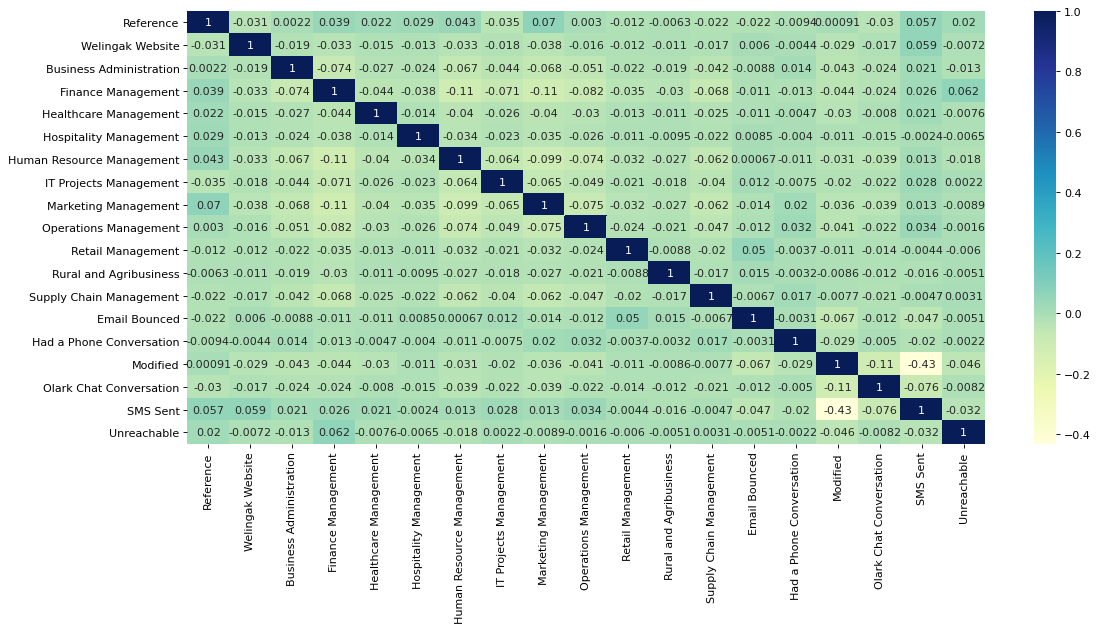

In [72]:
#Correlation:
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train_lr[col1].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

#The overall accuracy is 76%

#Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

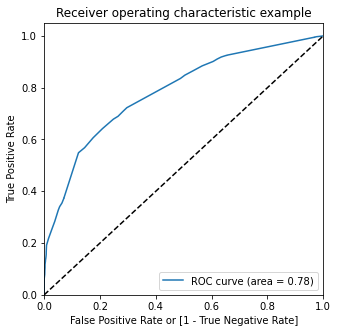

In [75]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [76]:
#Calculating the area under the curve(GINI)
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve


In [77]:
auc = auc_val(fpr,tpr)
auc

0.7834308966940619

#Finding Optimal Cutoff Point
#Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [78]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.219269,5065,0,1,1,1,0,0,0,0,0,0,0
1,0,0.190933,542,0,1,1,0,0,0,0,0,0,0,0
2,1,0.996968,6538,1,1,1,1,1,1,1,1,1,1,1
3,0,0.154990,7315,0,1,1,0,0,0,0,0,0,0,0
4,1,0.675008,6666,1,1,1,1,1,1,1,1,0,0,0


In [79]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379339  1.000000  0.000000
0.1   0.1  0.393622  0.996935  0.024886
0.2   0.2  0.586780  0.901489  0.394434
0.3   0.3  0.711011  0.722855  0.703773
0.4   0.4  0.746388  0.568301  0.855231
0.5   0.5  0.752699  0.549037  0.877174
0.6   0.6  0.719150  0.376532  0.928552
0.7   0.7  0.704700  0.283275  0.962269
0.8   0.8  0.688092  0.191331  0.991705
0.9   0.9  0.667497  0.130911  0.995451


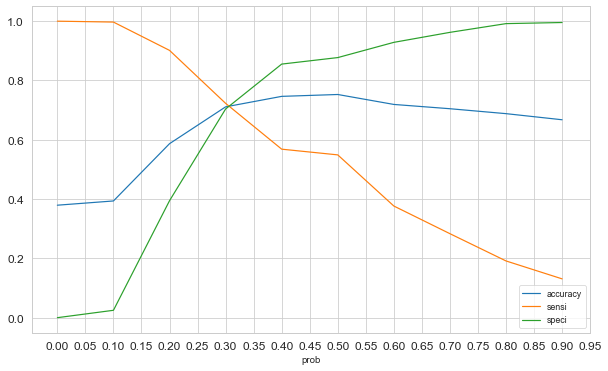

In [80]:
#  plot between accuracy sensitivity and specificity for various probabilities.
#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the curve above, 0.33 is the optimum point to take it as a cutoff probability.


In [81]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.219269,5065,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.190933,542,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.996968,6538,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.154990,7315,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.675008,6666,1,1,1,1,1,1,1,1,0,0,0,1


#Assigning Lead Score


In [82]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.219269,5065,0,1,1,1,0,0,0,0,0,0,0,0,22
1,0,0.190933,542,0,1,1,0,0,0,0,0,0,0,0,0,19
2,1,0.996968,6538,1,1,1,1,1,1,1,1,1,1,1,1,100
3,0,0.154990,7315,0,1,1,0,0,0,0,0,0,0,0,0,15
4,1,0.675008,6666,1,1,1,1,1,1,1,1,0,0,0,1,68


In [83]:
#Overall Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [84]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7228546409807356

In [85]:
# specificity
TN / float(TN+FP)

0.7037730800107038

In [86]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.29622691998929623


In [87]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5986221899927484


In [88]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8060067422617223


#Precision and Recall


In [89]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3278,  459],
       [1030, 1254]], dtype=int64)

In [90]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7320490367775832

In [91]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5490367775831874

In [92]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)


0.7320490367775832

In [93]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)


0.5490367775831874

#Precision and recall tradeoff

In [94]:
y_train_pred_final.Converted, y_train_pred_final.predicted


(0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6016    0
 6017    0
 6018    1
 6019    1
 6020    1
 Name: Converted, Length: 6021, dtype: int64,
 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 6016    0
 6017    1
 6018    1
 6019    1
 6020    1
 Name: predicted, Length: 6021, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


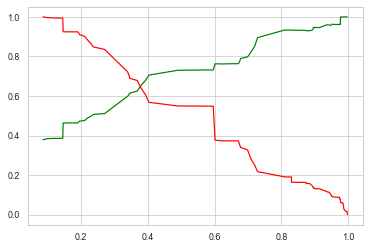

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#Making predictions on the test set

In [97]:
X_test_lr[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test_lr[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test_lr.head()


,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,Outside India,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Unemployed,Other Cities,Email Bounced,Email Link Clicked,Email Marked Spam,Email Opened,Email Received,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
386,656385,0.4,0.078785,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7983,588646,0.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3185,629511,0.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7588,591492,0.4,0.013204,0.666667,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4515,616420,0.3,0.171215,0.500000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [98]:
X_test_lr = X_test_lr[col5]
X_test_lr.head()

,Reference,Welingak Website,Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Email Bounced,Had a Phone Conversation,Modified,Olark Chat Conversation,SMS Sent,Unreachable
386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7983,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3185,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7588,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4515,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [99]:
#Adding the constant
X_test_sm = sm.add_constant(X_test_lr)


In [100]:
y_test_pred = res.predict(X_test_sm)


In [101]:
y_test_pred[:10]

386     0.270763
7983    0.086227
3185    0.830342
7588    0.195692
4515    0.720488
1781    0.270763
8927    0.596186
196     0.145621
7131    0.270763
4571    0.270763
dtype: float64

In [102]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
386,0.270763
7983,0.086227
3185,0.830342
7588,0.195692
4515,0.720488


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test_lr)

In [104]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [105]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [106]:

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [107]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,386,0.270763
1,0,7983,0.086227
2,1,3185,0.830342
3,1,7588,0.195692
4,0,4515,0.720488


In [108]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [109]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,386,0.270763
1,0,7983,0.086227
2,1,3185,0.830342
3,1,7588,0.195692
4,0,4515,0.720488


In [110]:
y_pred_final.shape

(2581, 3)

#Using the probability threshold value 0f 0.30 on the test dataset to predict if a lead will convert

In [111]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.30 else 0)


In [112]:
y_pred_final.head()


,Converted,Prospect ID,Converted_prob,final_predicted
0,0,386,0.270763,0
1,0,7983,0.086227,0
2,1,3185,0.830342,1
3,1,7588,0.195692,0
4,0,4515,0.720488,1


In [113]:

# Let's check the overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.708252615265401

In [114]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1098  479]
 [ 274  730]]


#Confusion Matrix 

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negative

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7228546409807356

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.7037730800107038

# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [118]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Reference                    3.36
Welingak Website             5.41
Business Administration      0.34
Finance Management           0.45
Human Resource Management    0.50
IT Projects Management       0.33
Marketing Management         0.56
Operations Management        0.60
Supply Chain Management      0.36
Email Bounced               -1.20
Had a Phone Conversation     2.58
Modified                    -0.78
Olark Chat Conversation     -1.37
SMS Sent                     1.38
Unreachable                  0.95
dtype: float64

In [119]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Reference                    62.11
Welingak Website            100.00
Business Administration       6.31
Finance Management            8.39
Human Resource Management     9.24
IT Projects Management        6.02
Marketing Management         10.31
Operations Management        11.09
Supply Chain Management       6.58
Email Bounced               -22.28
Had a Phone Conversation     47.76
Modified                    -14.40
Olark Chat Conversation     -25.34
SMS Sent                     25.53
Unreachable                  17.57
dtype: float64

In [120]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Reference                    12
Welingak Website              9
Business Administration      11
Finance Management            5
Human Resource Management     2
IT Projects Management        8
Marketing Management          3
Operations Management         4
Supply Chain Management       6
Email Bounced                 7
Had a Phone Conversation     14
Modified                     13
Olark Chat Conversation      10
SMS Sent                      0
Unreachable                   1
dtype: int64

In [121]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)


,index,0
1,Welingak Website,100.00
0,Reference,62.11
10,Had a Phone Conversation,47.76


# Conclusion

After analysis of the models, the final characteristics received are

1)all P value  coefficients are less than 0.05

2)VIF value less than 2, which means there is no multicollineraty among the features.The same has been show through heatmap

3)The overall accuracy is 77% and the probability thresolhold is 0.30 , which seems fine and acceptable.

The top three variables in the model which contribute most towards the probability of a lead getting converted

Welingak Website

Reference

Had a Phone Conversation